In [156]:
import pandas as pd
import requests
import time
import csv
import re
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
url = '/Users/rishikeshdhokare/Downloads/MergedDataSet/Final/final_omdb_data_no_duplicates.csv'
df = pd.read_csv(url)

Most Famous Lead Actors (Popularity Index):
             Lead_Actor  num_movies  avg_rating  total_votes  \
1948          Tom Hanks          32    7.162500     12876434   
1943         Tom Cruise          31    7.035484     10479956   
1214  Leonardo DiCaprio          18    7.561111     13910954   
357      Christian Bale          20    7.265000     11985178   
226           Brad Pitt          19    7.268421     10061632   
434    Daniel Radcliffe          12    7.216667      6184426   
1000        Johnny Depp          22    6.936364      7632604   
2034         Will Smith          18    6.855556      6308870   
957           Joe Russo           4    8.075000      4309522   
1655  Robert Downey Jr.          10    7.160000      5851143   

      total_box_office  popularity_index  
1948        4120929291          0.898718  
1943        4087880697          0.832301  
1214        2329220035          0.798411  
357         1877513422          0.700996  
226         1447331022          0.62

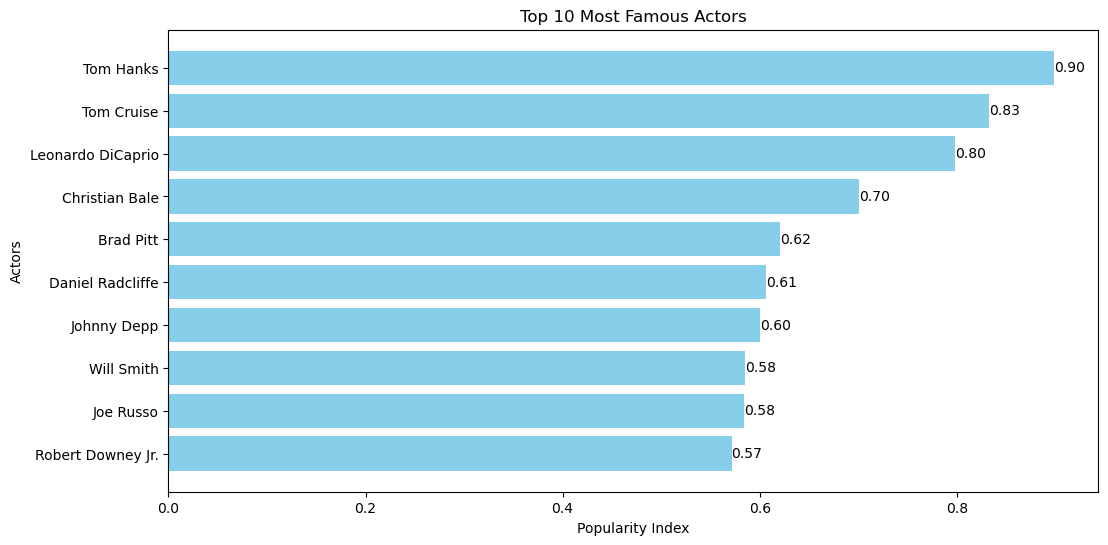

In [160]:
#Hypothesis 2
df['Lead_Actor'] = df['Actor'].str.split(',').str[0]  
df['Lead_Actor'] = df['Lead_Actor'].str.strip()

# Convert BoxOffice and imdbVotes to numeric
df['BoxOffice'] = pd.to_numeric(df['BoxOffice'].replace(r'[\$,]', '', regex=True), errors='coerce')
df['imdbVotes'] = pd.to_numeric(df['imdbVotes'].replace(',', '', regex=True), errors='coerce')

#Group by Lead Actor and calculate the required metrics
lead_actor_statistics_df = df.groupby('Lead_Actor').agg(
    num_movies=('Title', 'count'),          
    avg_rating=('imdbRating', 'mean'),      
    total_votes=('imdbVotes', 'sum'),        
    total_box_office=('BoxOffice', 'sum')   
).reset_index()

scaler = MinMaxScaler()

# Drop NaN values
lead_actor_statistics_df.dropna(subset=['avg_rating', 'total_votes', 'total_box_office'], inplace=True)

lead_actor_statistics_df[['norm_rating', 'norm_votes', 'norm_box_office']] = scaler.fit_transform(
    lead_actor_statistics_df[['avg_rating', 'total_votes', 'total_box_office']]
)

lead_actor_statistics_df['popularity_index'] = (lead_actor_statistics_df['norm_rating'] + 
                                         lead_actor_statistics_df['norm_votes'] + 
                                         lead_actor_statistics_df['norm_box_office']) / 3

#Sort by combined score to find the most famous lead actor
most_famous_lead_actor_df = lead_actor_statistics_df.sort_values(by='popularity_index', ascending=False)
print("Most Famous Lead Actors (Popularity Index):")
print(most_famous_lead_actor_df[['Lead_Actor', 'num_movies', 'avg_rating', 'total_votes', 'total_box_office', 'popularity_index']].head(10))

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(most_famous_lead_actor_df['Lead_Actor'].head(10), most_famous_lead_actor_df['popularity_index'].head(10), color='skyblue')
plt.xlabel('Popularity Index')
plt.ylabel('Actors')
plt.title('Top 10 Most Famous Actors')
plt.gca().invert_yaxis()
for index, value in enumerate(most_famous_lead_actor_df['popularity_index'].head(10)):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()
